In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [39]:
df = pd.read_csv('data/20220208_Final_result.csv')

# Data exploration

### Remove Null Price rows and change type to float

In [40]:
df = df[pd.to_numeric(df['Price'], errors='coerce').notnull()]

In [41]:
df = df.astype({"Price": float}, errors='raise')

### Remove duplicate ID

In [42]:
df['Immoweb ID'].value_counts()

9691876    4
9662650    3
9597143    3
8237073    3
9687272    3
          ..
9623733    1
9245768    1
9606238    1
9695276    1
7921699    1
Name: Immoweb ID, Length: 13893, dtype: int64

In [43]:
df = df.drop_duplicates(['Immoweb ID'], keep='last')
df['Immoweb ID'].value_counts()

9729720    1
9678715    1
9697071    1
9557609    1
9678634    1
          ..
9518030    1
9622950    1
9478102    1
9620790    1
7921699    1
Name: Immoweb ID, Length: 13893, dtype: int64

### Remove subtype 

In [44]:
df = df[df['property sub-type'] != "APARTMENT_BLOCK"]
df['property sub-type'].value_counts()

VILLA                   2468
GROUND_FLOOR            1606
DUPLEX                  1580
MIXED_USE_BUILDING      1240
PENTHOUSE               1170
FLAT_STUDIO              873
EXCEPTIONAL_PROPERTY     566
SERVICE_FLAT             500
MANSION                  479
TOWN_HOUSE               383
COUNTRY_COTTAGE          292
LOFT                     271
BUNGALOW                 212
FARMHOUSE                171
TRIPLEX                   99
KOT                       95
CHALET                    94
MANOR_HOUSE               62
CASTLE                    50
Name: property sub-type, dtype: int64

# Data Cleaning

### Building condition

In [45]:
df['Building condition'].value_counts()
df['Building condition'].unique()

array(['Good', nan, 'As new', 'To renovate', 'To be done up',
       'Just renovated', 'To restore'], dtype=object)

In [46]:
building_condition_map = {'As new': 6, 'Just renovated': 5, 'Good': 4, 'To be done up': 3, 'To renovate':2, 'To restore':1}
df = df.applymap(lambda s: building_condition_map.get(s) if s in building_condition_map else s)

In [47]:
df['Building condition'].isnull().sum()

3828

In [48]:
df['Building condition'] = df['Building condition'].fillna(2)
df['Building condition'].isnull().sum()

0

### Property type & Post code

In [ ]:
# Copying the original Property type and Post code column values in new columns
df['Prop_orig'] = df['Property type']
df['Post_code_orig'] = df['Post code']
df = pd.get_dummies(df, columns=['Property type', 'Post code'])

### Kitchen type	


In [52]:
Kit_type_dict = {"USA uninstalled" : 0, 
                 "Not installed" : 0, 
                 "Installed": 1, 
                 "USA installed": 1,
                 "Semi equipped": 1,
                 "USA semi equipped": 1,
                 "Hyper equipped": 2,
                 "USA hyper equipped": 2
                }

df = df.replace(Kit_type_dict)
df["Kitchen type"] = df["Kitchen type"].fillna(0)


df

,Immoweb ID,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,...,Post code_9960,Post code_9968,Post code_9970,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992
0,9729720,PENTHOUSE,179000.0,4.0,1.0,1.0,Yes,9.0,No,NaN,...,0,0,0,0,0,0,0,0,0,0
1,9729785,PENTHOUSE,255000.0,4.0,1.0,1.0,Yes,46.0,No,2.0,...,0,0,0,0,0,0,0,0,0,0
2,9729784,PENTHOUSE,255000.0,4.0,1.0,1.0,Yes,46.0,No,2.0,...,0,0,0,0,0,0,0,0,0,0
3,9729780,PENTHOUSE,620000.0,4.0,1.0,3.0,Yes,70.0,No,2.0,...,0,0,0,0,0,0,0,0,0,0
4,9727201,PENTHOUSE,379000.0,4.0,2.0,2.0,No,110.0,No,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,SERVICE_FLAT,132000.0,6.0,0.0,1.0,NaN,NaN,No,NaN,...,0,0,0,0,0,0,0,0,0,0
14537,7770553,SERVICE_FLAT,177000.0,6.0,0.0,1.0,NaN,NaN,No,NaN,...,0,0,0,0,0,0,0,0,0,0
14538,7770551,SERVICE_FLAT,190000.0,6.0,0.0,2.0,NaN,NaN,No,NaN,...,0,0,0,0,0,0,0,0,0,0
14539,7921693,SERVICE_FLAT,1350000.0,2.0,0.0,30.0,NaN,NaN,No,NaN,...,0,0,0,0,0,0,0,0,0,0


### Bedrooms


### Furnished


In [53]:
df['Furnished'].unique()

array(['Yes', 'No', nan], dtype=object)

In [54]:
df['Furnished'].isnull().sum()

4080

#### fill No to missing value then map to 1,0

In [55]:
df['Furnished'] = df['Furnished'].fillna("No")
df['Furnished'] = df['Furnished'].apply(lambda v: 0 if v == "No" else 1)

#### double check if value is 1, 0 and no missing value

In [56]:
print(df['Furnished'].unique())
print(df['Furnished'].isna().sum())

[1 0]
0


### Terrace surface + Terrace	


#### Combine terrace & terrace surface in yes and no

In [57]:
df['Terrace_Combined'] = np.where(df['Terrace surface'].isnull() & df['Terrace'].isnull(), 'No', 'Yes')

#### Transform Terrace_Combined to 0 & 1

In [58]:
terrace = ['No', 'Yes']

ordenc = OrdinalEncoder(categories=[terrace])

df[["Terrace_Combined"]] = ordenc.fit_transform(df[["Terrace_Combined"]])

df

,Immoweb ID,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,...,Post code_9968,Post code_9970,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined
0,9729720,PENTHOUSE,179000.0,4.0,1.0,1.0,1,9.0,No,NaN,...,0,0,0,0,0,0,0,0,0,1.0
1,9729785,PENTHOUSE,255000.0,4.0,1.0,1.0,1,46.0,No,2.0,...,0,0,0,0,0,0,0,0,0,1.0
2,9729784,PENTHOUSE,255000.0,4.0,1.0,1.0,1,46.0,No,2.0,...,0,0,0,0,0,0,0,0,0,1.0
3,9729780,PENTHOUSE,620000.0,4.0,1.0,3.0,1,70.0,No,2.0,...,0,0,0,0,0,0,0,0,0,1.0
4,9727201,PENTHOUSE,379000.0,4.0,2.0,2.0,0,110.0,No,3.0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,SERVICE_FLAT,132000.0,6.0,0.0,1.0,0,NaN,No,NaN,...,0,0,0,0,0,0,0,0,0,0.0
14537,7770553,SERVICE_FLAT,177000.0,6.0,0.0,1.0,0,NaN,No,NaN,...,0,0,0,0,0,0,0,0,0,1.0
14538,7770551,SERVICE_FLAT,190000.0,6.0,0.0,2.0,0,NaN,No,NaN,...,0,0,0,0,0,0,0,0,0,1.0
14539,7921693,SERVICE_FLAT,1350000.0,2.0,0.0,30.0,0,NaN,No,NaN,...,0,0,0,0,0,0,0,0,0,0.0


#### Drop Terrace and Terrace Surface columns

In [59]:
df = df.drop(columns =['Terrace', 'Terrace surface'])

df

,Immoweb ID,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Tenement building,Number of frontages,Swimming pool,...,Post code_9968,Post code_9970,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined
0,9729720,PENTHOUSE,179000.0,4.0,1.0,1.0,1,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
1,9729785,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1.0
2,9729784,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1.0
3,9729780,PENTHOUSE,620000.0,4.0,1.0,3.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1.0
4,9727201,PENTHOUSE,379000.0,4.0,2.0,2.0,0,No,3.0,No,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,SERVICE_FLAT,132000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0
14537,7770553,SERVICE_FLAT,177000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
14538,7770551,SERVICE_FLAT,190000.0,6.0,0.0,2.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
14539,7921693,SERVICE_FLAT,1350000.0,2.0,0.0,30.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0


### Tenement building	


In [115]:
df = df.drop(columns =['Tenement building'])

df

,Immoweb ID,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,...,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined,garden_label,price/m2,region,commune
0,9729720,PENTHOUSE,179000.0,4.0,1.0,1.0,1,NaN,NaN,0.0,...,0,0,0,0,0,1.0,0,2841.27,Brussels,Evere
1,9729785,PENTHOUSE,255000.0,4.0,1.0,1.0,1,2.0,NaN,0.0,...,0,0,0,0,0,1.0,0,6071.43,Flanders,"Uitkerke, Blankenberge"
2,9729784,PENTHOUSE,255000.0,4.0,1.0,1.0,1,2.0,NaN,0.0,...,0,0,0,0,0,1.0,0,6071.43,Flanders,"Uitkerke, Blankenberge"
3,9729780,PENTHOUSE,620000.0,4.0,1.0,3.0,1,2.0,NaN,0.0,...,0,0,0,0,0,1.0,0,4133.33,Flanders,"Uitkerke, Blankenberge"
4,9727201,PENTHOUSE,379000.0,4.0,2.0,2.0,0,3.0,No,0.0,...,0,0,0,0,0,1.0,0,3158.33,Brussels,Laeken
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,SERVICE_FLAT,132000.0,6.0,0.0,1.0,0,NaN,NaN,0.0,...,0,0,0,0,0,0.0,0,1389.47,Flanders,"Asse, Kobbegem, Bekkerzeel, Mollem"
14537,7770553,SERVICE_FLAT,177000.0,6.0,0.0,1.0,0,NaN,NaN,0.0,...,0,0,0,0,0,1.0,0,1863.16,Flanders,"Asse, Kobbegem, Bekkerzeel, Mollem"
14538,7770551,SERVICE_FLAT,190000.0,6.0,0.0,2.0,0,NaN,NaN,0.0,...,0,0,0,0,0,1.0,0,2000.00,Flanders,"Asse, Kobbegem, Bekkerzeel, Mollem"
14539,7921693,SERVICE_FLAT,1350000.0,2.0,0.0,30.0,0,NaN,NaN,0.0,...,0,0,0,0,0,0.0,0,900.00,Wallonia,"Jamiolle, Vodecée, Philippeville, Villers-En-F..."


### Swimming pool	


### Garden + Garden surface	


In [60]:
print(df['Garden'].isna().sum())
print(df['Garden'].unique())

11051
[nan 'Yes']


In [61]:
df.loc[df['Garden surface'].isna()]

,Immoweb ID,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Tenement building,Number of frontages,Swimming pool,...,Post code_9968,Post code_9970,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined
0,9729720,PENTHOUSE,179000.0,4.0,1.0,1.0,1,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
1,9729785,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1.0
2,9729784,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1.0
3,9729780,PENTHOUSE,620000.0,4.0,1.0,3.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,0,1.0
4,9727201,PENTHOUSE,379000.0,4.0,2.0,2.0,0,No,3.0,No,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,SERVICE_FLAT,132000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0
14537,7770553,SERVICE_FLAT,177000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
14538,7770551,SERVICE_FLAT,190000.0,6.0,0.0,2.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.0
14539,7921693,SERVICE_FLAT,1350000.0,2.0,0.0,30.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.0


#### Combine ['Garden'] and ['Garden surface] as ['garden_label] and map to 1,0

In [62]:
def categorise(col):  
    if col['Garden'] == "Yes" or col['Garden surface'] > 0:
        return 1
    return 0


df['garden_label'] = df.apply(lambda col: categorise(col), axis=1)

#### double check if value is 1, 0 and no missing value

In [63]:
df['garden_label'].unique()

array([0, 1])

#### drop column Garden and Garden surface

In [64]:
df = df.drop(columns =['Garden', 'Garden surface'])

df

,Immoweb ID,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Tenement building,Number of frontages,Swimming pool,...,Post code_9970,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined,garden_label
0,9729720,PENTHOUSE,179000.0,4.0,1.0,1.0,1,No,NaN,NaN,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,PENTHOUSE,620000.0,4.0,1.0,3.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,PENTHOUSE,379000.0,4.0,2.0,2.0,0,No,3.0,No,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,SERVICE_FLAT,132000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
14537,7770553,SERVICE_FLAT,177000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,1.0,0
14538,7770551,SERVICE_FLAT,190000.0,6.0,0.0,2.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,1.0,0
14539,7921693,SERVICE_FLAT,1350000.0,2.0,0.0,30.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0


### Garden orientation	


#### Drop garden orientation

In [65]:
df = df.drop(columns =['Garden orientation'])

df

,Immoweb ID,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Tenement building,Number of frontages,Swimming pool,...,Post code_9970,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined,garden_label
0,9729720,PENTHOUSE,179000.0,4.0,1.0,1.0,1,No,NaN,NaN,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,PENTHOUSE,620000.0,4.0,1.0,3.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,PENTHOUSE,379000.0,4.0,2.0,2.0,0,No,3.0,No,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,SERVICE_FLAT,132000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
14537,7770553,SERVICE_FLAT,177000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,1.0,0
14538,7770551,SERVICE_FLAT,190000.0,6.0,0.0,2.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,1.0,0
14539,7921693,SERVICE_FLAT,1350000.0,2.0,0.0,30.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0


### How many fireplaces?	


#### Discard fireplaces

In [66]:
df = df.drop(columns =["How many fireplaces?"])

df

,Immoweb ID,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Tenement building,Number of frontages,Swimming pool,...,Post code_9970,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined,garden_label
0,9729720,PENTHOUSE,179000.0,4.0,1.0,1.0,1,No,NaN,NaN,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,PENTHOUSE,620000.0,4.0,1.0,3.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,PENTHOUSE,379000.0,4.0,2.0,2.0,0,No,3.0,No,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,SERVICE_FLAT,132000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
14537,7770553,SERVICE_FLAT,177000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,1.0,0
14538,7770551,SERVICE_FLAT,190000.0,6.0,0.0,2.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,1.0,0
14539,7921693,SERVICE_FLAT,1350000.0,2.0,0.0,30.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0


### Surface of the plot




In [92]:
# Fill empty values with 0
df['Surface of the plot'].fillna(0, inplace = True)

### Living area

#### Fill missing values in Living area row

In [77]:
def fill_living_area(col):  
    if col['Living area'] > 0:
        return col['Living area']
    else: 
        if col['Prop_orig'] == 'APARTMENT':
            return 95.0
        else:
            return 150.0


df['Living area'] = df.apply(lambda col: fill_living_area(col), axis=1)


In [79]:
# Test if there are null values in living area
df['Living area'].isnull().sum()

0

### Price per square metre

In [80]:
df['price/m2'] = (df['Price']/ df['Living area']).round(2)

df

,Immoweb ID,property sub-type,Price,Building condition,Kitchen type,Bedrooms,Furnished,Tenement building,Number of frontages,Swimming pool,...,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined,garden_label,price/m2
0,9729720,PENTHOUSE,179000.0,4.0,1.0,1.0,1,No,NaN,NaN,...,0,0,0,0,0,0,0,1.0,0,2841.27
1,9729785,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,1.0,0,6071.43
2,9729784,PENTHOUSE,255000.0,4.0,1.0,1.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,1.0,0,6071.43
3,9729780,PENTHOUSE,620000.0,4.0,1.0,3.0,1,No,2.0,NaN,...,0,0,0,0,0,0,0,1.0,0,4133.33
4,9727201,PENTHOUSE,379000.0,4.0,2.0,2.0,0,No,3.0,No,...,0,0,0,0,0,0,0,1.0,0,3158.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,SERVICE_FLAT,132000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0,1389.47
14537,7770553,SERVICE_FLAT,177000.0,6.0,0.0,1.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,1.0,0,1863.16
14538,7770551,SERVICE_FLAT,190000.0,6.0,0.0,2.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,1.0,0,2000.00
14539,7921693,SERVICE_FLAT,1350000.0,2.0,0.0,30.0,0,No,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0,900.00


In [82]:
# Test if there are null values in price/m2 column
df['price/m2'].isnull().sum()

0

### Bedrooms

In [126]:
# Fill missing values with 2 bedrooms
df['Bedrooms'] = df['Bedrooms'].fillna(2).astype(int)

df["Bedrooms"].value_counts()

2      4389
3      2929
4      1723
1      1350
5       909
6       429
7       144
8       126
10       61
9        49
12       21
11       20
14       11
13        8
18        7
16        5
17        5
15        5
30        4
25        3
23        3
50        2
60        1
204       1
20        1
22        1
28        1
27        1
35        1
24        1
Name: Bedrooms, dtype: int64

### Frontages

In [125]:
df['Number of frontages'].isnull().sum()

#get ['number of frontages'] with values and calc mean
selected_rows = df[~df['Number of frontages'].isnull()]
mean_num_of_frontages = selected_rows['Number of frontages'].mean(axis=0).astype(int).round(0)
mean_num_of_frontages

# fill mean value to missing value
df['Number of frontages'] = df['Number of frontages'].fillna(mean_num_of_frontages)
df['Number of frontages'].isnull().sum()

# double check
df['Number of frontages'].value_counts()

3.002052     3927
4.000000     3504
2.000000     3346
3.000000     1333
1.000000       91
6.000000        6
7.000000        2
5.000000        1
16.000000       1
Name: Number of frontages, dtype: int64

### Final check missing value %




In [83]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Immoweb ID,Immoweb ID,0.0
property sub-type,property sub-type,0.0
Price,Price,0.0
Building condition,Building condition,0.0
Kitchen type,Kitchen type,0.0
...,...,...
Post code_9991,Post code_9991,0.0
Post code_9992,Post code_9992,0.0
Terrace_Combined,Terrace_Combined,0.0
garden_label,garden_label,0.0


# Data Analysis

### Group Post code to region

In [84]:
%pip install pgeocode --quiet

Note: you may need to restart the kernel to use updated packages.


In [85]:
import pgeocode
nomi = pgeocode.Nominatim("be")
nomi.query_postal_code("1040")['place_name']

'Etterbeek'

In [86]:
nomi.query_postal_code("5030")['state_name']

'Wallonie'

In [87]:
def get_state(col):  
    region = nomi.query_postal_code(col['Post_code_orig'])['state_name']
    if region == "Wallonie":
        region = "Wallonia"
    elif region == "Vlaanderen":
        region = "Flanders"
    else:
        region = "Brussels"
    return region

def get_commune(col):  
    return nomi.query_postal_code(col['Post_code_orig'])['place_name']

df['region'] = df.apply(lambda col: get_state(col), axis=1)
df['commune'] = df.apply(lambda col: get_commune(col), axis=1)


In [88]:
df[['commune', 'Post_code_orig', 'region']]

,commune,Post_code_orig,region
0,Evere,1140,Brussels
1,"Uitkerke, Blankenberge",8370,Flanders
2,"Uitkerke, Blankenberge",8370,Flanders
3,"Uitkerke, Blankenberge",8370,Flanders
4,Laeken,1020,Brussels
...,...,...,...
14536,"Asse, Kobbegem, Bekkerzeel, Mollem",1730,Flanders
14537,"Asse, Kobbegem, Bekkerzeel, Mollem",1730,Flanders
14538,"Asse, Kobbegem, Bekkerzeel, Mollem",1730,Flanders
14539,"Jamiolle, Vodecée, Philippeville, Villers-En-F...",5600,Wallonia


### Graphs

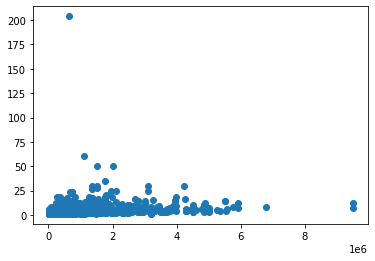

In [110]:
plt.scatter(x = 'Price', y = 'Bedrooms', data =df)